# Distribuzioni di probabilità di variabili continue

Le definizioni che seguono sono adeguate ad una qualsiasi definizione di probabilità, purché soddisfi gli assioni di Kolmogorov. Quindi: probabilità frequentista e, come vedremo nel seguito, anche Bayesiana. Come abbiamo visto, la probabilità classica si applica difficilmente al caso continuo.

Dato un intervallo di valori possibili $\Omega$ per una variabile casuale continua $x$, definiamo la densità di probabilità $f(x)$ come misura della probabilità di un intervallo $\mathrm{d}x$:

$\displaystyle P([x, x+\mathrm{d}x[) = f(x)\,\mathrm{d}x$

e, equivalentemente:

$\displaystyle \frac{\mathrm{d}P(x)}{\mathrm{d}x} = f(x)$

Ad qualsiasi intervallo $[a, b\,[$ corrisponderà una probabilità data da:

$\displaystyle P([a, b\,[) = \int_a^b\!\! f(x)\,\mathrm{d}x$

Più in generale, dato un insieme $A$, che corrisponde all'*evento* $E$ in base alla relazione: $A = \{x\in\Omega: E\}$, la probabilità dell'evento $E$ si può scrivere come:

$\displaystyle P(E) = \int_A f(x)\,\mathrm{d}x$

Spesso abuseremo della notazione, scrivendo indifferentemente $P(E)$ oppure $P(A)$.

La condizione di normalizzazione si scrive:

$\displaystyle \int_\Omega f(x)\,\mathrm{d}x = 1$

Spesso si usa l'acronimo **PDF** (*Probability Density Function*).

# Esempio con una distribuzione specifica

Consideriamo ad esempio la distribuzione *gamma* definita per $x>0$ come:

$\displaystyle f(x;\kappa,\theta) = C\,x^{k-1}e^{-x/\theta}$

La condizione di normalizzazione determina il valore di $C$:

$\displaystyle f(x;\kappa,\theta) = \frac{x^{\kappa-1}e^{-x/\theta}}{\theta^\kappa\,\Gamma(\kappa)}$

Dove la funzione $\Gamma(\kappa)$ è definita da:

$\displaystyle\Gamma(\kappa) = \int_0^\infty x^{\kappa-1}e^{-x}\,\mathrm{d}x$ 

Per $\kappa$ intero $\Gamma(\kappa) = (\kappa -1)!$.

L'implementazione in ```scipy``` è data dalla funzione[```gamma```](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gamma.html), dove viene usata la parametrizzazione $\alpha =\kappa$ e $\beta = 1/\theta$

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gamma

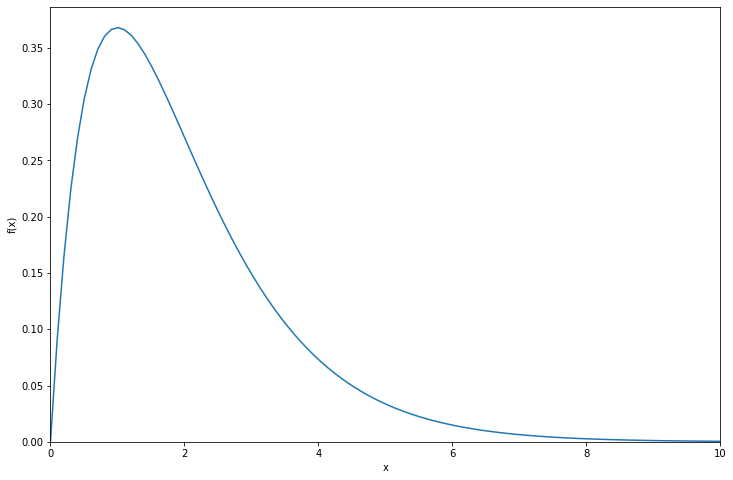

In [4]:
plt.figure(figsize=(12,8))
x = np.linspace(0, 10, 100)
k = 2
y = gamma.pdf(x, k)
plt.plot(x,y)
plt.xlim(0, 10)
plt.ylim(bottom=0)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

## Indicatori statistici per una distribuzione continua
Per una distribuzione continua possimo definire media, varianza e deviazione standard similmenta a come avevamo fatto per una distribuzione discreta:

$\displaystyle \mathbb{E}[x] = \int_{-\infty}^{+\infty} \!\!\!\!x f(x)\,\mathrm{d}x$

$\displaystyle \mathbb{E}[\varphi(x)] = \int_{-\infty}^{+\infty} \!\!\!\!\varphi(x) f(x)\,\mathrm{d}x$

$\displaystyle \mathbb{V}\mathrm{ar}[x] = \mathbb{E}[x^2]-\mathbb{E}[x]^2 = 
\mathbb{E}[(x-\mathbb{E}[x])^2] =
\int_{-\infty}^{+\infty} \!\!\!\!(x-\mathbb{E}[x])^2 f(x)\,\mathrm{d}x$

$\displaystyle \sigma_x = \sqrt{\mathbb{V}\mathrm{ar}[x]}$

Similmente si possono definire la *skewness* e la *kurtosis*, ma qui non andremo nei dettagli.

### Mediana

$\tilde{x}$ tale che:

$\displaystyle\int_{-\infty}^{\tilde{x}}f(x)\,\mathrm{d}x = 0.5$

oppure:

$\displaystyle\int_{\tilde{x}}^{+\infty}f(x)\,\mathrm{d}x = 0.5$

### Calcolo della moda con python
Non c'è una funzione per calcolare la moda della PDF. Si può però trovare il massimo di $f(x)$ con <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fmin.html">```scipy.optimize.fmin```</a> come minimo di $-f(x)$.

Notare che analiticamente si può dimostrare che a moda vale:

$x^\star = \theta\,(\kappa-1)$

Per questo esercizio, però, preferiamo usare un esempio di calcolo numerico, che vale in generale anche per altri casi in cui la soluzione analitica non esiste.

In [5]:
from scipy.optimize import fmin

mean:  2.0
median:  1.6783469900166612
Optimization terminated successfully.
         Current function value: -0.367879
         Iterations: 10
         Function evaluations: 20
mode:  1.0


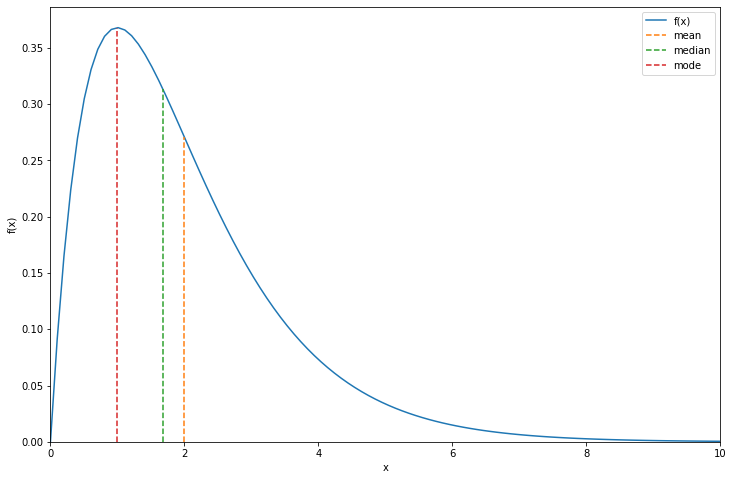

In [6]:
plt.figure(figsize=(12,8))
x = np.linspace(0, 10, 100)
k = 2
my_pdf = gamma(k, scale=1)
y = my_pdf.pdf(x)
plt.plot(x, y, label='f(x)')
mean = my_pdf.mean()
print('mean: ', mean)
plt.plot([mean,mean], [0, my_pdf.pdf(mean)], label='mean', linestyle='--')
median = my_pdf.median()
print('median: ', median)
plt.plot([median,median], [0, my_pdf.pdf(median)], label='median', linestyle='--')
mode = fmin(lambda x: -my_pdf.pdf(x), 1)[0]
print('mode: ', mode)
plt.plot([mode,mode], [0, my_pdf.pdf(mode)], label='mode', linestyle='--')
plt.xlim(0, 10)
plt.ylim(bottom=0)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()

In [7]:
#var = gamma.var(k)
var = my_pdf.var()
std = my_pdf.std()
print('variance:', var)
print('std. dev.:', std)
mean, var, skew, kurt = my_pdf.stats(moments='mvsk')
print('skewness:', skew)
print('kurtosis:', kurt)

variance: 2.0
std. dev.: 1.4142135623730951
skewness: 1.414213562373095
kurtosis: 3.0


# Distribuzione cumulativa

È spesso comodo, come già abbiamo visto per le distribuzioni discrete, definire la distribuzione cumulativa di una PDF $f(x)$ come:

$\displaystyle F(x) = \int_{-\infty}^x\!\!f(x)\,\mathrm{d}x$

L'estremo inferiore di integrazione può essere limitato al valore minimo che può avere $x$.

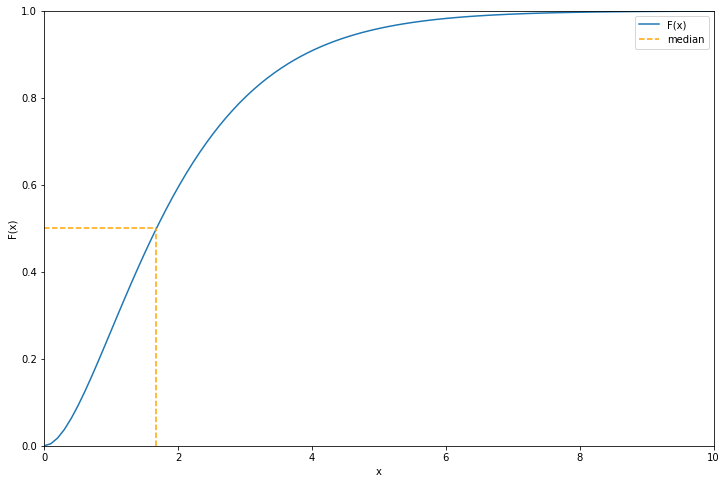

In [9]:
plt.figure(figsize=(12,8))
k = 2
#y = gamma.cdf(x, k)
y = my_pdf.cdf(x)
plt.plot(x,y, label='F(x)')
plt.plot([median,median], [0, my_pdf.cdf(median)], color='orange', label='median', linestyle='--')
plt.plot([0,median], [0.5, 0.5], color='orange', linestyle='--')
plt.ylim(0, 1)
plt.xlim(0, 10)
plt.xlabel('x')
plt.ylabel('F(x)')
plt.legend()
plt.show()

In questo modo, la probabilità di un intervallo $[a, b\,[$ si può scrivere come:

$\displaystyle P([a,b\,[) = \int_a^b\!\!f(x)\,\mathrm{d}x = F(b) - F(a)$

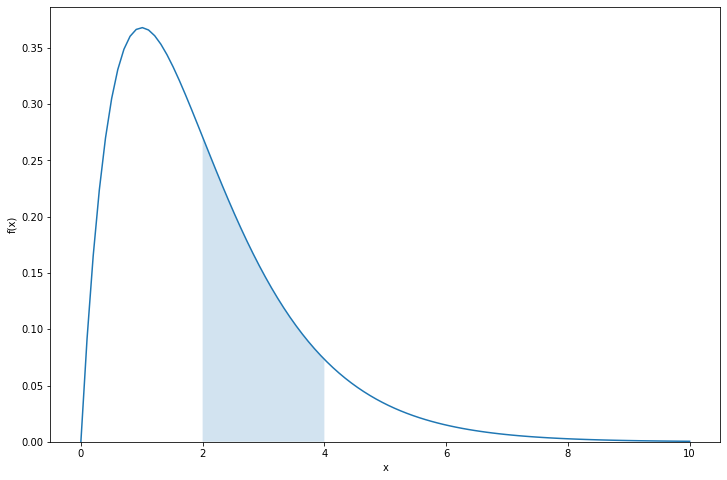

In [10]:
plt.figure(figsize=(12,8))
a,b = 2,4
x_ab = np.linspace(a, b, 100)
y_ab = my_pdf.pdf(x_ab)
plt.plot(x, my_pdf.pdf(x))
plt.fill_between(x_ab, y_ab, alpha=0.2)
plt.ylim(bottom=0)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

In [11]:
prob = my_pdf.cdf(b)-my_pdf.cdf(a)
print('P([{:.2f},{:.2f}[) = {:.2f}'.format(a,b,prob))

P([2.00,4.00[) = 0.31


# Quantili

Il problema di trovare i *quantili* di una distribuzione è in pratica l'inverso del calcolo della probabilità associata ad un intervallo.

Si definisce quantile ad un certo livello di probabilità $p$ il valore $x_p$ per il quale:

$\displaystyle P(x<x_p) = \int_{-\infty}^{x_p} \!\!\!f(x)\,\mathrm{d}x = F(x_p) = p$

Quando la probabilità $p$ è indicata come percentuale si parla anche di *percentili* (es.: 25° percentile corrisponde a $p$=0.25).

La *mediana* è il 50° percentile.

Si usano in letteratura anche *quartili* (corrispondenti al 25%, 50% e 75% di probabilità) e *quintili* (corrispondenti al 20%, 40%, 60%, 80% di probabilità). 

Numericamente, bisogna invertire l'equazione:

$F(x_p) = p$ 

per ricavare $x_p$.

In python le radici di un'equazione si possono trovare numericamente con la funzione [```fsolve```](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fsolve.html).

Da notare che la soluzione può essere un *array* di valori perché la funzione può risolvere anche un sistema di equazioni.

In [12]:
from scipy.optimize import fsolve

In [13]:
p = 0.1
def f_minus_p(x):
    return my_pdf.cdf(x)-p
root = fsolve(f_minus_p, 0.5)
x_p = root[0]

In [14]:
# in una sola linea di codice:
x_p = fsolve(lambda x: my_pdf.cdf(x)-p, 0.5)[0]
print("{:.2%} percentile: {:.2f}".format(p, x_p))

10.00% percentile: 0.53


Verifichiamo che il calcolo che abbiamo fatto del percentile sia corretto:

In [15]:
print("F({:.2f}): {:.2}".format(x_p,my_pdf.cdf(x_p)))

F(0.53): 0.1


In [16]:
perc = np.arange(0.05, 1, 0.05)
x_perc = [fsolve(lambda x: my_pdf.cdf(x)-p, 0.5)[0] for p in perc]
for pc, x_pc in zip(perc, x_perc):
    print("{:.2%} -> x={:.2f}".format(pc, x_pc))

5.00% -> x=0.36
10.00% -> x=0.53
15.00% -> x=0.68
20.00% -> x=0.82
25.00% -> x=0.96
30.00% -> x=1.10
35.00% -> x=1.24
40.00% -> x=1.38
45.00% -> x=1.52
50.00% -> x=1.68
55.00% -> x=1.84
60.00% -> x=2.02
65.00% -> x=2.22
70.00% -> x=2.44
75.00% -> x=2.69
80.00% -> x=2.99
85.00% -> x=3.37
90.00% -> x=3.89
95.00% -> x=4.74


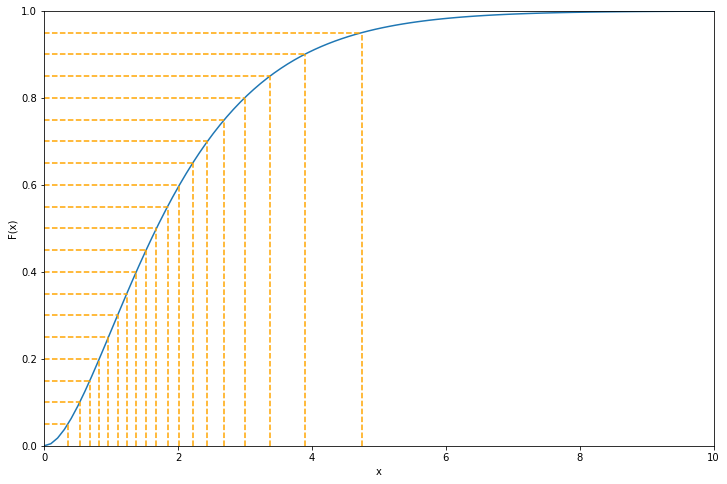

In [17]:
plt.figure(figsize=(12,8))
step = 0.01
k = 2
y = my_pdf.cdf(x)
plt.plot(x, y, label='F(x)')
for p, x_p in zip(perc, x_perc):
    plt.plot([x_p,x_p], [0, p], color='orange', linestyle='--')
    plt.plot([0,x_p], [p, p], color='orange', linestyle='--')
plt.ylim(0, 1)
plt.xlim(0, 10)
plt.xlabel('x')
plt.ylabel('F(x)')
plt.show()

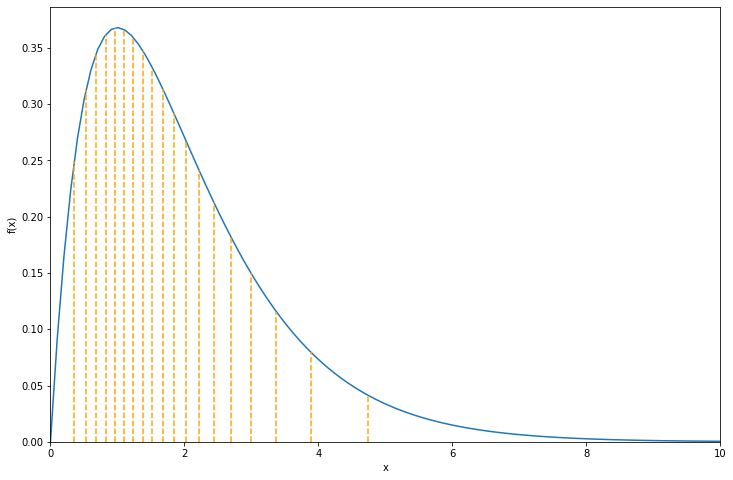

In [19]:
plt.figure(figsize=(12,8))
x_ab = np.linspace(2, 4, 100)
y_ab = my_pdf.pdf(x_ab)
plt.plot(x, my_pdf.pdf(x))
for p, x_p in zip(perc, x_perc):
    plt.plot([x_p,x_p], [0, my_pdf.pdf(x_p)], color='orange', label='{:.2%}'.format(p), linestyle='--')
plt.xlim(0, 10)
plt.ylim(bottom=0)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

# Alcune distribuzioni di probabilità notevoli

Nel seguito riporteremo alcune delle distribuzioni di probabilità tra le più usate.


## Distribuzione uniforme

La distribuzione unforme è caratterizzata da:
    
$\displaystyle u(x; a, b) = \left\{
\begin{array}{ccc}
\frac{\displaystyle 1}{\displaystyle b-a} & \mathrm{se} & a \le x \le b \\
0 & \mathrm{se} & x<a\,\,\mathrm{o}\,\,x> b
\end{array}
\right.$

Si dimostra che:

$\displaystyle\mathbb{E}(x)=\frac{a+b}{2}$

$\displaystyle\sigma_x=\frac{b-a}{\sqrt{12}}$

#### Esempio: 

Un rivelatore a strip riceve particelle distribuite uniformemente lungo ciascuna strip. Considerando tutte le particelle che cadono in una strip, la deviazione standard della distribuzione della posizione è data da $l\sqrt{12}$, dove $l$ è il passo delle strip. 

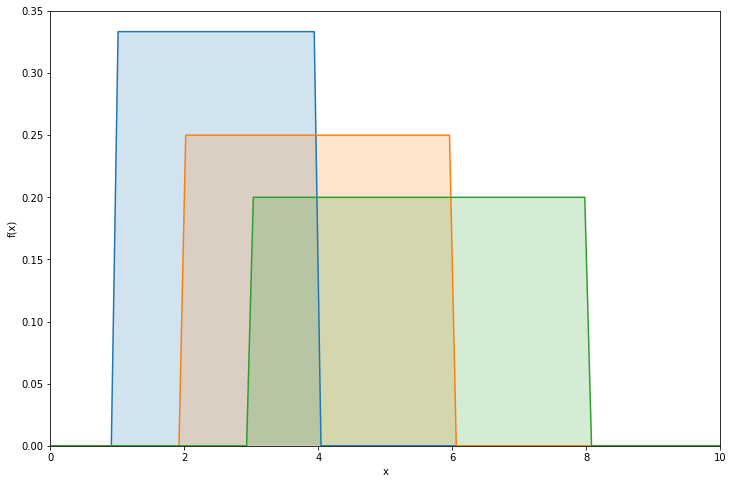

In [20]:
from scipy.stats import uniform
plt.figure(figsize=(12,8))
x = np.linspace(0, 10, 100)
y = uniform.pdf(x, k)
for a, b in ((1, 4), (2, 6), (3, 8)):
    y = uniform.pdf(x, loc=a, scale=b-a)
    plt.fill_between(x, y, alpha=0.2,linewidth=2)
    plt.plot(x, y)
plt.xlim(0, 10)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.ylim(bottom=0)
plt.show()

In [21]:
mean, var, skew, kurt = uniform.stats(moments='mvsk')
print(skew, kurt)

0.0 -1.2


## Distribuzione esponenziale

$f(x;\lambda) = \lambda e^{-\lambda x}$

Si dimostra che:

$\mathbb{E}(x) = 1/\lambda$

$\sigma_x = 1/\lambda$

Da notare che spesso si usa la parametrizzazione alternativa:

$\displaystyle f(x;\tau) = \frac{1}{\tau} e^{- x/\tau}$

In questo modo $x$ e $\tau$ hanno la stessa dimensione. Questo modello è utile per fenomeni di decadimento dove $x=t$ rappresenta un tempo:

$\displaystyle f(t;\tau) = \frac{1}{\tau} e^{- t/\tau}$

$\tau$ è legato al tempo di dimezzamento $\tau_2$ della distribuzione. Abbiamo infatti:

$\displaystyle f(\tau_2;\tau) = \frac{1}{2} f(0;\tau)$

Quando:

$\displaystyle \frac{1}{\tau} e^{- \tau_2/\tau} = \frac{1}{2}\cdot\frac{1}{\tau}$

Ossia:

$\displaystyle e^{- \tau_2/\tau} = \frac{1}{2}\implies -\tau_2/\tau = \log\left(\frac{1}{2}\right)$

$\displaystyle {\tau_2/\tau} = \log{2} \implies {\tau_2} = \tau\log{2} = \frac{\log{2}}{\lambda}$


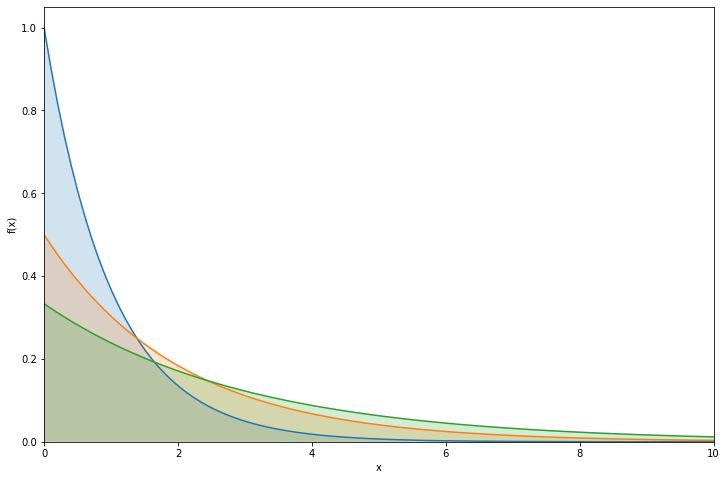

In [22]:
from scipy.stats import expon
plt.figure(figsize=(12,8))
x = np.linspace(0, 10, 100)
for lam in (1, 2, 3):
    y = expon.pdf(x, scale=lam)
    plt.fill_between(x, y, alpha=0.2,linewidth=2)
    plt.plot(x, y)
plt.xlim(0, 10)
plt.ylim(bottom=0)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

In [23]:
expon.mean()

1.0

In [24]:
expon.std()

1.0

In [25]:
mean, var, skew, kurt = expon.stats(moments='mvsk')
print(skew, kurt)

2.0 6.0


In [26]:
expon.median()

0.6931471805599453

## Distribuzione gaussiana o normale

$\displaystyle g(x; \mu, \sigma) = \frac{1}{\sqrt{2\pi\sigma^2}}\exp\left[-\frac{(x-\mu)^2}{2\sigma^2}\right]$

Nel caso $\mu=0$ e $\sigma=1$ si parla di normale standard:

$\displaystyle \phi(x) = \frac{1}{\sqrt{2\pi}}e^{-{x^2}/{2}}$

$\mu$ e $\sigma$ rappresentano il valor medio e la deviazione standard di $x$.

La distribuzione cumulativa è:

$\displaystyle \Phi(x) = \frac{1}{\sqrt{2\pi}}\int_{-\infty}^{x}e^{-x^{\prime 2}/2}\,\mathrm{d}x^\prime
=\frac{1}{2}\left[\mathrm{erf}\left(\frac{x}{\sqrt{2}}\right)+1\right]$

Hanno spesso applicazione le aree degli intervalli $[\mu-Z\sigma,\mu+Z\sigma]$, pari a:

$\displaystyle  P(Z\sigma) =  \frac{1}{\sqrt{2\pi}}\int_{-Z\sigma}^{Z\sigma}e^{-x^{\prime 2}/2}\,\mathrm{d}x^\prime =
\Phi(Z)-\Phi(-Z) = \mathrm{erf}\left(\frac{Z}{\sqrt{2}}\right)$



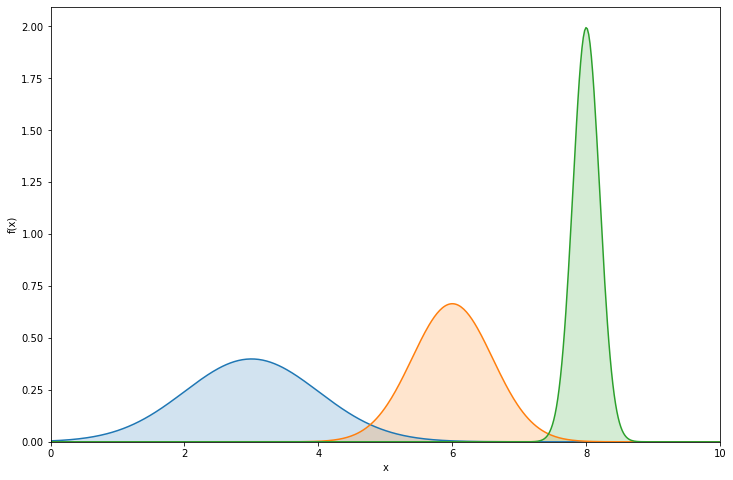

In [29]:
from scipy.stats import norm
plt.figure(figsize=(12,8))
x = np.linspace(0, 10, 500)
for mu,sigma in ((3, 1), (6, 0.6), (8, 0.2)):
    y = norm.pdf(x, loc=mu, scale=sigma)
    plt.fill_between(x, y, alpha=0.2,linewidth=2)
    plt.plot(x, y)
plt.xlim(0, 10)
plt.ylim(bottom=0)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

In [30]:
def n_sigma(z):
    return norm.cdf(z)-norm.cdf(-z)
for z in (1, 2, 3, 4, 5):
    print("P(Z sigma) = {:.6f}".format(n_sigma(z)))

P(Z sigma) = 0.682689
P(Z sigma) = 0.954500
P(Z sigma) = 0.997300
P(Z sigma) = 0.999937
P(Z sigma) = 0.999999


In [31]:
norm.mean()

0.0

In [32]:
norm.std()

1.0

In [33]:
mean, var, skew, kurt = norm.stats(moments='mvsk')
print(skew, kurt)

0.0 0.0


# La Delta di Dirac

Esiste un modo formale per descrivere distribuzioni di variabili discrete con lo stesso formalismo delle distribuzioni di probabilità continue.

Immaginiamo di avere una distribuzione che diventi sempre più stretta man mano che un parametro $\sigma$ si avvicina a zero. Un esempio è la distribuzione gaussiana che abbiamo visto sopra.

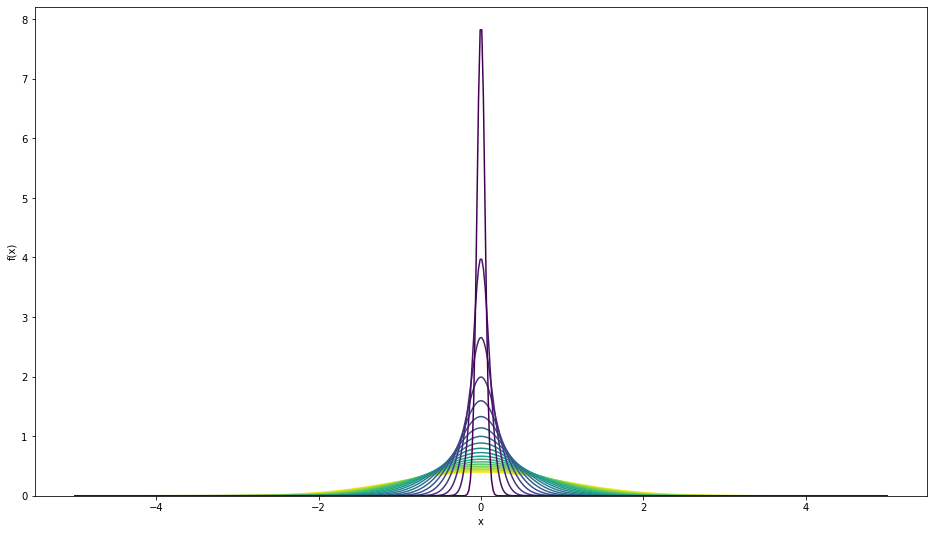

In [42]:
plt.figure(figsize=(16,9))
x = np.linspace(-5, 5, 500)
sigma = np.linspace(1.0, 0.05, 20)
colors = np.linspace(0, 1, len(sigma))
for s, c in zip(sigma, colors):
    plt.plot(x, norm.pdf(x, scale=s), color=plt.get_cmap('viridis')(1-c))
plt.ylim(bottom=0)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

Man mano che $\sigma$ diventa più piccolo, la distribuzione diventa più stretta. Per preservare la normalizzazione (l'area sotto la curva deve essere uguale ad uno) la curva diventa sempre più alta.

Al limite per $\sigma\rightarrow 0$, possiamo immaginare che la distribuzione sia pari a zero ovunque tranne che nel punto $x=0$ in cui assume un valore infinito.

Definiamo questa distribuzione come $\delta(x)$, le cui proprietà sono:

$\delta(x)=0\,\,\,\forall x\ne 0$

$\displaystyle\int_{-\infty}^{+\infty}\!\!\!\!\!\!\delta(x)\,\mathrm{d}x = 1$

Possiamo traslare la $\delta$ in modo che sia centrata in un punto $x_0$:

$\delta(x-x_0)$

Risulterà quindi:

$\delta(x-x_0)=0\,\,\forall x\ne x_0$

$\displaystyle\int_{-\infty}^{+\infty}\!\!\!\!\!\!\delta(x-x_0)\,\mathrm{d}x = 1$

La proprietà principale della Delta di Dirac è:

$\displaystyle\int_{-\infty}^{+\infty}\!\!\!\!\!\!f(x)\delta(x-x_0)\,\mathrm{d}x = f(x_0)$

# Distribuzioni continue e delta di Dirac

Una distribuzione discreta può essere modellizzata nel continuo come somma di delta di Dirac. Ad esempio, la distribuzione del risultato del lancio di un dado può essere definita come:

$\displaystyle p(x) = \frac{1}{6}\sum_{k=1}^6 \delta(x-k)$

Risulta infatti:

$p(x) =0\,\,\, \forall x \notin \{1, 2, 3, 4, 5, 6\}$

$\displaystyle\int_{-\infty}^{+\infty}\!\!\!\!\!\! p(x)\,\mathrm{d}x = \frac{1}{6}\cdot 6 = 1$

$\displaystyle p(\{k\}) = \frac{1}{6}$ per $k=1,\cdots,6$

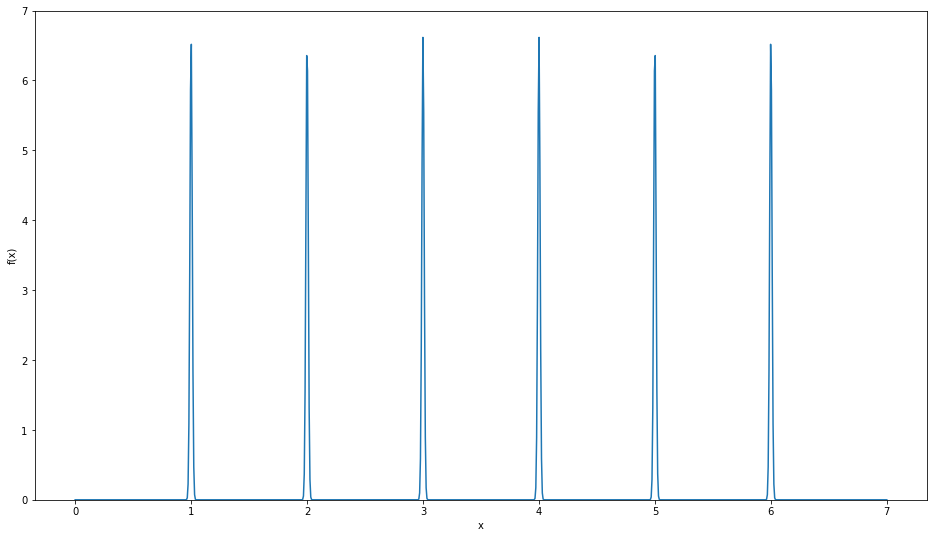

In [44]:
plt.figure(figsize=(16,9))
x = np.linspace(0, 7, 1000)
sigma=0.01
def pdf(x):
    p = 0
    for k in range(1,7):
        p += norm.pdf(x, scale=sigma, loc=k)
    p /= 6
    return p
plt.xlabel('x')
plt.ylabel('f(x)')
plt.ylim(0,7)
plt.plot(x, pdf(x))
plt.show()

Nella pratica, i calcoli numerici fatti con approssimazioni di funzioni *impulsive* con picchi localizzati, come quella sopra, sono parecchio difficili da trattare e meritano algoritmi ad hoc. È evidente perché se calcolo la funzione, quasi ovunque vale zero, e intorno al punto di interesse può avere valori molto alti che possono dare problemi agli algoritmi numerici. Anche il campionamento della funzione richiederebbe di infittire i punti in un intorno molto piccolo di punti di interesse.

Le delta di Dirac possono essere trattate matematicamente nell'ambito della *teoria delle distribuzioni*, o funzioni generalizzate. Ma è argomento del corso di metodi matematici della fisica, e per i nostri scopi ci accontenteremo di questa definizione pragmatica.

Una proprietà interessante della delta di Dirac è quando viene integrato il prodotto con un'altra funzione:

$\displaystyle\int_{-\infty}^{+\infty}\!\!\!\!\!\! f(x)\,\delta(x-y)\,\mathrm{d}x = f(y)$

Questo perché, intorno a $x=y$, se consideriamo $\delta(x-y)$ come un picco molto stretto, $f(x)$ può essere considerata approssimativamente costante e vale circa $f(y)$, che possiamo portare fuori dal segno di integrazione. Il risultato si ottiene passando al limite di un picco infinitamente stretto.

Questa proprietà ricorda quella della delta di Kronecker, facendo corrispondere alla sommatoria $\sum_{i=1}^N$ l'integrale $\int_{-\infty}^{+\infty}$:

$\displaystyle \sum_{i=1}^N f_i\delta_{ij} = f_j$

Analogamente, per distribuzioni discrete con valori $P(x_i) = P_i$, possiamo scrivere:

$\displaystyle p(x) = \sum_{i=1}^N P_i\,\delta(x-x_i)$

Nella pratica, useremo molto raramente questi casi.

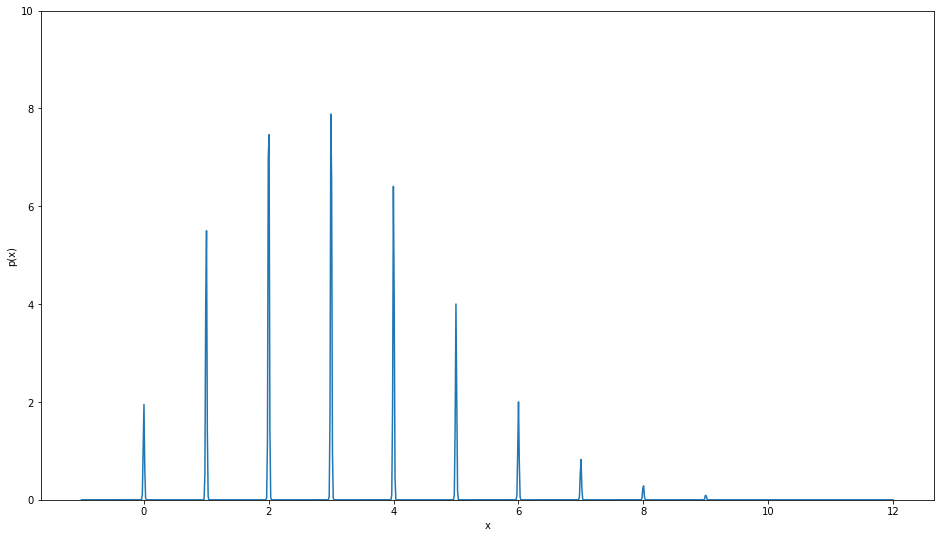

In [45]:
from scipy.stats import poisson
plt.figure(figsize=(16,9))
x = np.linspace(-1, 12, 1000)
sigma=0.01
def pdf(x):
    p = 0
    for k in range(10):
        p += norm.pdf(x, scale=sigma, loc=k)*poisson.pmf(k, 3)
    return p
plt.ylim(0, 10)
plt.xlabel('x')
plt.ylabel('p(x)')
plt.plot(x, pdf(x))
plt.show()

## Esempio di passaggio da una distribuzione continua ad una distribuzione impulsiva 

Consideriamo di avere una variabile $y$ distribuita secondo una distribuzione normale $g(y)$ con $\mu=0$ e $\sigma=1$.

La variabile:

$x = \mathrm{max}(y, 0)$

varrà $0$ il 50% delle volte, e $x$ il rimanente 50%.

La distribuzione di probabilità quindi vale:

$\displaystyle f(x) = \frac{1}{2} \delta(x) + \frac{1}{2}\theta(x)\,g(x)$

dove abbiamo introdotto la *funzione gradino* $\theta(x)$:

$\displaystyle 
\theta(x) = \left\{
\begin{array}{ccc}
0 & \mathrm{se} & x<0\\
1 & \mathrm{se} & x\ge0
\end{array}
\right.
$

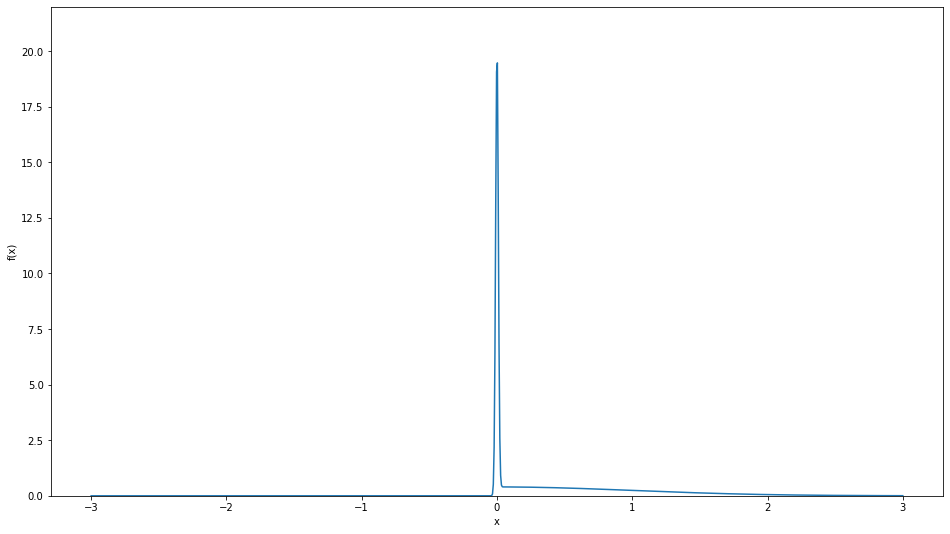

In [46]:
plt.figure(figsize=(16,9))
sigma=0.01
x = np.linspace(-3, 3, 1000)
theta = [1 if x_val>=0 else 0 for x_val in x]
g = norm.pdf(x)*theta
delta = 0.5*norm.pdf(x,scale=sigma)
plt.plot(x, g+delta)
plt.ylim(0, 22)
plt.xlabel('x')
plt.ylabel('f(x)')
#plt.yscale('log')
#plt.ylim(0.0001,100)
plt.show()

# Spunti per esercizi

* Calcolare per una gaussiana gli intervalli $]-\infty,x^{\mathrm{up}}]$ e $[x^{\mathrm{lo}},+\infty[$ che corrispondono al 90% e al 95% di probabilità.

In [47]:
x_up = fsolve(lambda x: norm.cdf(x)-0.9, 0)[0]
print(x_up)

1.2815515655445482


In [48]:
x_up = fsolve(lambda x: norm.cdf(x)-0.95, 0)[0]
print(x_up)

1.644853626951362


Per simmetria, $x^{\mathrm{lo}}$ sarà uguale a  $-x^{\mathrm{hi}}$ per una gaussiana. Proviamo comunque a fare un'implementazione numerica.

In [49]:
x_lo = fsolve(lambda x: norm.cdf(x)-0.1, 0)[0]
print(x_lo)

-1.2815515655445477


* Calcolare per una distribuzione normale standard gli intervalli $[-n\sigma,n\sigma]$ corrispondenti ad una probabilità del 90% e del 95%

In [50]:
n_sigma = fsolve(lambda x: (norm.cdf(x)-norm.cdf(-x))-0.9, 0)[0]
print(n_sigma)

1.6448536269513625


In [51]:
n_sigma = fsolve(lambda x: (norm.cdf(x)-norm.cdf(-x))-0.95, 0)[0]
print(n_sigma)

1.9599639845399508


* Determinare **numericamente** la relazione tra deviazione standard $\sigma$ e *Full Width Half Maximum* (FWHM) per una distribuzione normale.

In [52]:
f_half = norm.pdf(0)/2
n_sigma = fsolve(lambda x: norm.pdf(x)-f_half, 1)[0]
print("n sigma = ",n_sigma)
print("FWHM = ",2*n_sigma)
p_fwhm = norm.cdf(n_sigma)-norm.cdf(-n_sigma)
print("p(FWHM) = ",p_fwhm)

n sigma =  1.1774100225154749
FWHM =  2.3548200450309498
p(FWHM) =  0.760968108550488


* Trovare numericamente la *Full Width Half Maximum* (FWHM) per una distribuzione gamma con parametri $\theta$ e $\kappa$ noti.

In [53]:
kappa = 1.4
theta = 1.4
mode = (kappa-1)*theta
f_half = gamma.pdf(mode, kappa, scale=theta)/2
print(mode)
print(f_half)

0.5599999999999998
0.18702316444564027


In [54]:
x1 = fsolve(lambda x: gamma.pdf(x, kappa, scale=theta)-f_half, mode/2)[0]
x2 = fsolve(lambda x: gamma.pdf(x, kappa, scale=theta)-f_half, mode*2)[0]
print(x1, x2)

0.03904824115355509 2.3284078454005996


In [55]:
print("FWHM = ",x2-x1)
p_fwhm = gamma.cdf(x2, kappa, scale=theta)-gamma.cdf(x1, kappa, scale=theta)
print("p(FWHM) = ",p_fwhm)

FWHM =  2.2893596042470445
p(FWHM) =  0.6829648456411276


* Definite una funzione di vostra scelta. Calcolate la relativa PDF normalizzandola e graficare. Determinare media, mediana, deviazione standard in modo numerico usando librerie di python. Se necessario, cercare la [documentazione in rete](https://docs.scipy.org/doc/scipy/reference/tutorial/integrate.html) per l'integrazione numerica. Mostrare sul grafico i valori di questi indicatori.

12.15672075876106
Optimization terminated successfully.
         Current function value: -0.771548
         Iterations: 27
         Function evaluations: 54
mean, variance, sigma:  2.218841639633018 0.24962275970260173 0.49962261728488805


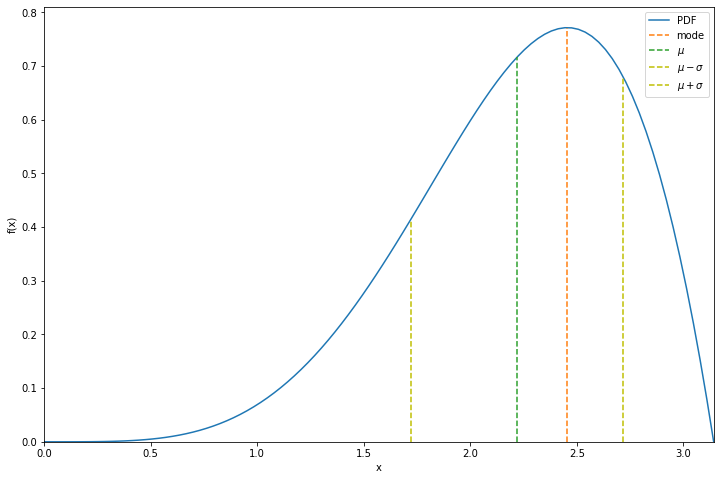

In [56]:
import scipy.integrate as integrate
import math
c_norm = 1
a, b = 0, math.pi
def my_pdf(x):
    return (x**3)*math.sin(x)/c_norm
c_norm = integrate.quad(my_pdf, a, b)[0]
print(c_norm)
mode = fmin(lambda x: -my_pdf(x), 0)[0]
x_mean = integrate.quad(lambda x: x*my_pdf(x), a, b)[0]
x2_mean = integrate.quad(lambda x: x*x*my_pdf(x), a, b)[0]
variance = x2_mean - x_mean*x_mean
sigma = math.sqrt(variance)
print("mean, variance, sigma: ", x_mean, variance, sigma)
plt.figure(figsize=(12,8))
x = np.linspace(a, b, 100)
y = np.vectorize(my_pdf)(x)
plt.plot(x,y, label='PDF')
plt.plot([mode,mode], [0, my_pdf(mode)], label='mode', linestyle='--')
plt.plot([x_mean,x_mean], [0, my_pdf(x_mean)], label='$\mu$', linestyle='--')
plt.plot([x_mean-sigma,x_mean-sigma], [0, my_pdf(x_mean-sigma)], label='$\mu-\sigma$', color='y', linestyle='--')
plt.plot([x_mean+sigma,x_mean+sigma], [0, my_pdf(x_mean+sigma)], label='$\mu+\sigma$', color='y', linestyle='--')
plt.xlim(a, b)
plt.ylim(bottom=0)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()

* Determinare e graficare una PDF di una variabile casuale che segua con il 30% di probabilità una distribuzione esponenziale e con il 20% di probabilità una gaussiana. Si scelgano valori opportuni dei parametri.

$p(x) = \alpha f(x) + (1-\alpha) g(x)$

$\displaystyle \int_{-\infty}^{+\infty}\!\!\!\!\!p(x)\,\mathrm{d}x = \alpha\int_{-\infty}^{+\infty}\!\!\!\!\!f(x)\,\mathrm{d}x+(1-\alpha)\int_{-\infty}^{+\infty}\!\!\!\!\!g(x)\,\mathrm{d}x = \alpha +(1-\alpha) = 1$

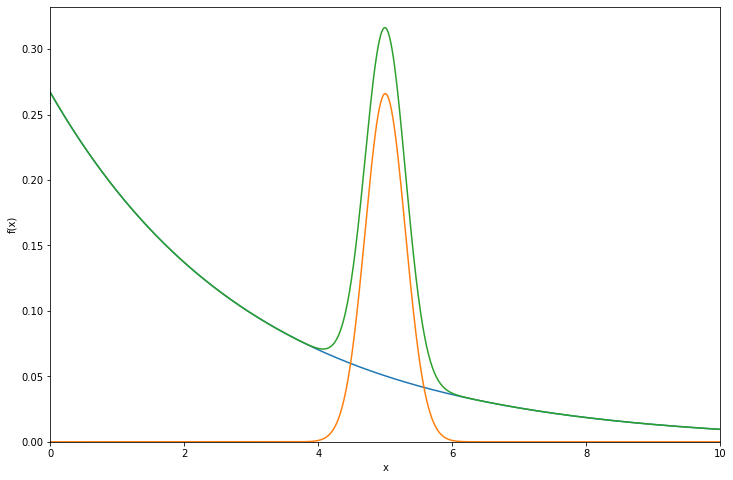

In [66]:
from scipy.stats import expon
plt.figure(figsize=(12,8))
a, b = 0, 10
x = np.linspace(a, b, 1000)
f_norm = 0.2
def pdf1(x):
     return expon.pdf(x, scale=3)
def pdf2(x):
     return norm.pdf(x, loc=5, scale=0.3)
def pdf(x):
    return (1-f_norm)*pdf1(x) + f_norm*pdf2(x)
y = pdf(x)
y1 = (1-f_norm)*pdf1(x)
y2 = f_norm*pdf2(x)
plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(x,y)
plt.xlim(a, b)
plt.ylim(bottom=0)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()